# GPT


In [ ]:
!pip install datasets pandas matplotlib seaborn

Now, let's load the DAIR-Emo dataset. We will use the `datasets` library for this.

In [ ]:
from datasets import load_dataset

# Load the DAIR-Emo dataset
# You might need to specify a sub-configuration if available, check the dataset documentation.
# For example, if there is a 'plain_text' config, you might use:
# dataset = load_dataset('dair-ai/emotion', 'plain_text')
# For this example, we will try loading without a specific config first.
try:
    dataset = load_dataset('dair-ai/emotion')
    print("Dataset loaded successfully.")
    print(dataset)
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please check the dataset documentation for available configurations and features.")

Dataset loaded successfully.
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


Let's examine the distribution of the emotion labels in the training set.

In [ ]:
import pandas as pd

# Convert the training split to a pandas DataFrame for easier analysis
train_df = dataset['train'].to_pandas()

# Get the value counts of the 'label' column
label_counts = train_df['label'].value_counts()

print("Label distribution in the training set:")
print(label_counts)

Label distribution in the training set:
label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64


Let's visualize the distribution of the emotion labels using a bar chart.

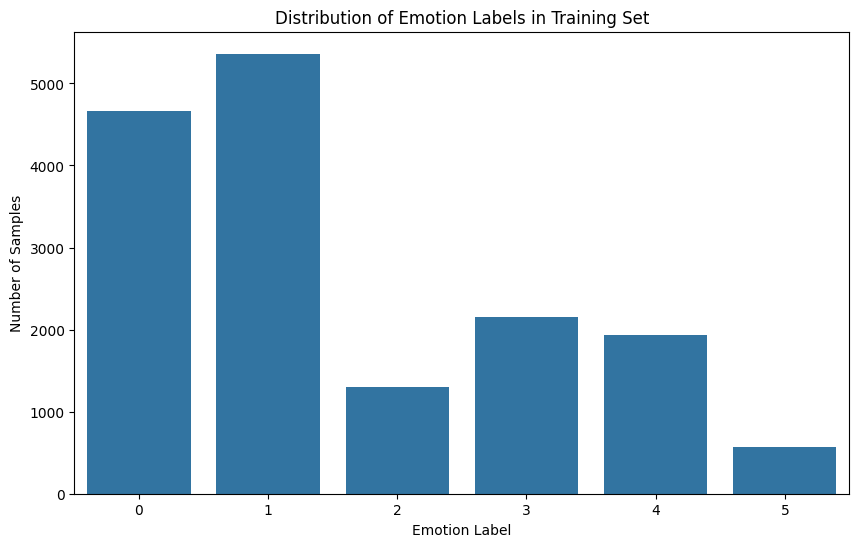

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Emotion Labels in Training Set')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

Let's merge the training, validation, and test splits into a single DataFrame.

In [ ]:
# Concatenate the train, validation, and test splits
merged_df = pd.concat([dataset['train'].to_pandas(),
                       dataset['validation'].to_pandas(),
                       dataset['test'].to_pandas()])

print("Merged DataFrame shape:", merged_df.shape)
display(merged_df.head())

Merged DataFrame shape: (20000, 2)


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
# Create a mapping from numerical labels to emotion names
label_to_emotion = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

# Apply the mapping to the 'label' column of the merged_df (or the relevant DataFrame you are working with)
# We need to ensure the label column is of a type that can be mapped (e.g., int)
merged_df['emotion'] = merged_df['label'].map(label_to_emotion)

print("Labels have been mapped to emotion names.")
display(merged_df.head())

# You can verify the new distribution by counting the emotion names
print("\nDistribution of emotion names:")
print(merged_df['emotion'].value_counts())

Labels have been mapped to emotion names.


,text,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger



Distribution of emotion names:
emotion
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64


Emotion distribution in the merged DataFrame:
emotion
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64


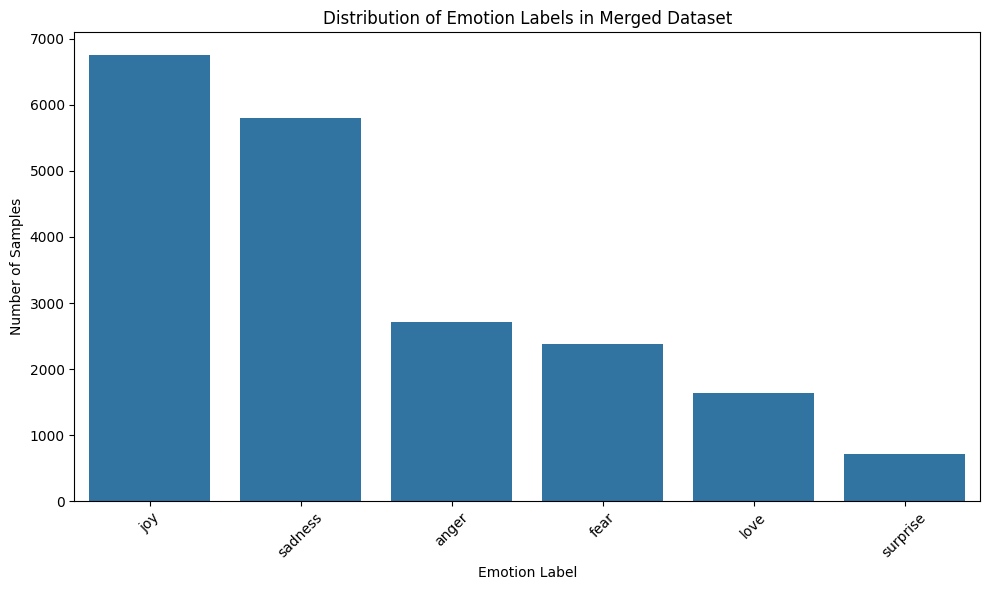

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts of the 'emotion' column in the merged DataFrame
emotion_counts = merged_df['emotion'].value_counts()

print("Emotion distribution in the merged DataFrame:")
print(emotion_counts)

# Visualize the emotion distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title('Distribution of Emotion Labels in Merged Dataset')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45) # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
# Remove rows with labels 0 and 1
filtered_df = merged_df[~merged_df['label'].isin([0, 1])]

print("Filtered DataFrame shape:", filtered_df.shape)
display(filtered_df.head())

Filtered DataFrame shape: (7442, 2)


,text,label
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4


In [ ]:
# Get the value counts of the 'label' column in the filtered DataFrame
filtered_label_counts = filtered_df['label'].value_counts()

print("Label distribution in the filtered DataFrame:")
print(filtered_label_counts)

Label distribution in the filtered DataFrame:
label
3    2709
4    2373
2    1641
5     719
Name: count, dtype: int64


In [ ]:
# Create a mapping from numerical labels to emotion names
label_to_emotion = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

# Apply the mapping to the 'label' column of the filtered_df
# We need to ensure the label column is of a type that can be mapped (e.g., int)
filtered_df['emotion'] = filtered_df['label'].map(label_to_emotion)

print("Labels in filtered_df have been mapped to emotion names.")
display(filtered_df.head())

# You can verify the new distribution by counting the emotion names
print("\nDistribution of emotion names in the filtered DataFrame:")
print(filtered_df['emotion'].value_counts())

Labels in filtered_df have been mapped to emotion names.


C:\Users\adria\AppData\Local\Temp\ipykernel_10876\1208960816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['emotion'] = filtered_df['label'].map(label_to_emotion)


,text,label,emotion
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
6,ive been taking or milligrams or times recomme...,5,surprise
7,i feel as confused about life as a teenager or...,4,fear



Distribution of emotion names in the filtered DataFrame:
emotion
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64


## Prepare Data for Conditional Generation

Format the data by prepending the emotion name to the text.

In [ ]:
# Ensure the 'emotion' column exists (from the previous step)
if 'emotion' not in filtered_df.columns:
    # Re-create the 'emotion' column if it was not successfully created before
    label_to_emotion = {
        0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'
    }
    filtered_df['emotion'] = filtered_df['label'].map(label_to_emotion)
    print("Re-created 'emotion' column.")


# Create the formatted text for conditional generation
# Format: "[Emotion Name]: [text]"
filtered_df['formatted_text'] = filtered_df.apply(lambda row: f"{row['emotion']}: {row['text']}", axis=1)

print("Data formatted for conditional generation.")
display(filtered_df.head())

Data formatted for conditional generation.


C:\Users\adria\AppData\Local\Temp\ipykernel_10876\2470532479.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['formatted_text'] = filtered_df.apply(lambda row: f"{row['emotion']}: {row['text']}", axis=1)


,text,label,emotion,formatted_text
2,im grabbing a minute to post i feel greedy wrong,3,anger,anger: im grabbing a minute to post i feel gre...
3,i am ever feeling nostalgic about the fireplac...,2,love,love: i am ever feeling nostalgic about the fi...
4,i am feeling grouchy,3,anger,anger: i am feeling grouchy
6,ive been taking or milligrams or times recomme...,5,surprise,surprise: ive been taking or milligrams or tim...
7,i feel as confused about life as a teenager or...,4,fear,fear: i feel as confused about life as a teena...


## Split Data into Train and Test

Split the formatted data into training and testing sets for fine-tuning the generative model.

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install transformers

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load a pre-trained GPT-2 model for text generation
# This is the correct model type for generating text
generation_model = GPT2LMHeadModel.from_pretrained('gpt2')
generation_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

print("GPT-2 model for text generation and tokenizer loaded successfully.")

GPT-2 model for text generation and tokenizer loaded successfully.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the filtered_df based on the 'formatted_text' column
train_df_gen, test_df_gen = train_test_split(filtered_df, test_size=0.2, random_state=42)

print("Shape of training set for generation:", train_df_gen.shape)
print("Shape of testing set for generation:", test_df_gen.shape)

display(train_df_gen.head())
display(test_df_gen.head())

Shape of training set for generation: (5953, 4)
Shape of testing set for generation: (1489, 4)


,text,label,emotion,formatted_text
1253,i don t feel betrayed coz the backstabber had ...,5,surprise,surprise: i don t feel betrayed coz the backst...
4331,ive been feeling very intimidated and overwhel...,4,fear,fear: ive been feeling very intimidated and ov...
1387,im not sure but theres nothing that will get a...,2,love,love: im not sure but theres nothing that will...
5923,i feel more terrified than the customers will ...,4,fear,fear: i feel more terrified than the customers...
854,i feel i would give up the sense of touch feel...,4,fear,fear: i feel i would give up the sense of touc...


,text,label,emotion,formatted_text
15098,i watch my friends going through changes and i...,3,anger,anger: i watch my friends going through change...
4754,i am still working through the guilt of feelin...,3,anger,anger: i am still working through the guilt of...
12486,i feel genuinely wronged,3,anger,anger: i feel genuinely wronged
12891,i feel scared rather than curl up like a threa...,4,fear,fear: i feel scared rather than curl up like a...
3814,i have eternal hope he says and when they arri...,2,love,love: i have eternal hope he says and when the...


In [ ]:
from datasets import Dataset

# Convert DataFrames to Hugging Face Dataset objects
train_dataset_gen = Dataset.from_pandas(train_df_gen)
test_dataset_gen = Dataset.from_pandas(test_df_gen)

# Add a padding token if the tokenizer doesn't have one
if generation_tokenizer.pad_token is None:
    generation_tokenizer.pad_token = generation_tokenizer.eos_token

# Function to tokenize the 'formatted_text' and add 'labels'
def tokenize_function_gen(examples):
    tokenized_inputs = generation_tokenizer(
        examples['formatted_text'], padding="max_length", truncation=True, max_length=128
    )
    # Add 'labels' which are a copy of 'input_ids' for language modeling
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()
    return tokenized_inputs

# Apply tokenization and add labels
tokenized_train_dataset_gen = train_dataset_gen.map(tokenize_function_gen, batched=True)
tokenized_test_dataset_gen = test_dataset_gen.map(tokenize_function_gen, batched=True)

print("Tokenization of generation data complete with labels added.")
print(tokenized_train_dataset_gen)
print(tokenized_test_dataset_gen)

Map:   0%|          | 0/5953 [00:00<?, ? examples/s]

Map:   0%|          | 0/1489 [00:00<?, ? examples/s]

Tokenization of generation data complete with labels added.
Dataset({
    features: ['text', 'label', 'emotion', 'formatted_text', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 5953
})
Dataset({
    features: ['text', 'label', 'emotion', 'formatted_text', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 1489
})


## Define training arguments

### Subtask:
Define the TrainingArguments for fine-tuning the generative model.

In [ ]:
# Print one row from the tokenized training dataset for generation
print(tokenized_train_dataset_gen[0])

{'text': 'i don t feel betrayed coz the backstabber had no grounds for their accusation but i m just amazed at some people s ability to do such things', 'label': 5, 'emotion': 'surprise', 'formatted_text': 'surprise: i don t feel betrayed coz the backstabber had no grounds for their accusation but i m just amazed at some people s ability to do such things', '__index_level_0__': 1253, 'input_ids': [11793, 7919, 25, 1312, 836, 256, 1254, 26281, 763, 89, 262, 736, 39029, 527, 550, 645, 9384, 329, 511, 25984, 475, 1312, 285, 655, 24562, 379, 617, 661, 264, 2694, 284, 466, 884, 1243, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 5

In [ ]:
!pip install accelerate>=0.26.0

In [ ]:
from transformers import TrainingArguments

# Define training arguments for generative model fine-tuning
training_args = TrainingArguments(
    output_dir="./generation_results",  # Output directory for generation fine-tuning
    num_train_epochs=3,  # Total number of training epochs
    per_device_train_batch_size=8,  # Batch size per device during training
    per_device_eval_batch_size=8,  # Batch size for evaluation
    weight_decay=0.01,  # Strength of weight decay
    logging_dir="./generation_logs",  # Directory for storing logs
    logging_steps=10,
    report_to="none", # Do not report to any online service
    fp16=True, # Enable mixed precision training
    eval_strategy="epoch", # Evaluate at the end of each epoch for hyperparameter search
    # Removed no_cuda=True to enable GPU usage
)

print("Training arguments for generation defined successfully.")

Training arguments for generation defined successfully.


## Define Model Initialization for Hyperparameter Search

### Subtask:
Create a function that initializes a new `GPT2LMHeadModel` for each trial of the hyperparameter search.

In [ ]:
from transformers import GPT2LMHeadModel

def model_init():
    # Load a pre-trained GPT-2 model for text generation
    # This function will be called by the Trainer for each trial
    return GPT2LMHeadModel.from_pretrained('gpt2')

## Define Objective Function for Hyperparameter Search

### Subtask:
Create a function that sets up the Trainer, trains the model with given hyperparameters, evaluates at each epoch, and returns the metric to be optimized.

In [ ]:
from transformers import Trainer
import numpy as np

def objective(trial):
    # Define hyperparameters to search
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True)
    # Removed per_device_train_batch_size from hyperparameter search
    num_train_epochs = trial.suggest_int("num_train_epochs", 1, 3) # Adjust max epochs if needed

    # Update training arguments with suggested hyperparameters
    training_args.learning_rate = learning_rate
    # Use the batch size from training_args, not suggested by Optuna
    # training_args.per_device_train_batch_size = per_device_train_batch_size
    training_args.num_train_epochs = num_train_epochs

    # Initialize Trainer
    # The model_init function is used here to create a new model for each trial
    trainer = Trainer(
        model_init=model_init, # Use the model_init function
        args=training_args,
        train_dataset=tokenized_train_dataset_gen, # Use the tokenized generation data
        eval_dataset=tokenized_test_dataset_gen,   # Use the tokenized generation data
        # For language modeling, compute_metrics is often not needed as loss is the primary metric
        # compute_metrics=compute_metrics, # Remove or adapt for generation task
    )

    # Set the padding token ID for the model config
    # This is important for generative models when using padding
    if trainer.model.config.pad_token_id is None:
         trainer.model.config.pad_token_id = generation_tokenizer.pad_token_id


    # Train the model
    trainer.train()

    # Evaluate the model and return the metric to optimize
    # For language modeling, evaluation loss is a common metric to minimize
    eval_results = trainer.evaluate()
    # We want to minimize the evaluation loss
    return -eval_results["eval_loss"] # Return negative loss to maximize in Optuna

In [ ]:
!pip install optuna

In [ ]:
import optuna
# Create an Optuna study
# We are minimizing the evaluation loss, so we set direction="minimize" or return negative loss and maximize
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner()) # Using MedianPruner for efficiency

# Run the hyperparameter search
study.optimize(objective, n_trials=3) # You can adjust the number of trials

# Print the best trial
print("Best trial:")
print(study.best_trial)

# Print the best hyperparameters
print("Best hyperparameters:")
print(study.best_params)

[I 2025-09-24 15:28:26,273] A new study created in memory with name: no-name-7da82698-6aa4-4e57-ae64-60bf89d5684f
`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Epoch,Training Loss,Validation Loss
1,0.688100,0.624078
2,0.605900,0.618948
3,0.629400,0.618888


[I 2025-09-24 15:35:31,381] Trial 0 finished with value: -0.6188881993293762 and parameters: {'learning_rate': 1.7092979268689306e-05, 'num_train_epochs': 3}. Best is trial 0 with value: -0.6188881993293762.


Epoch,Training Loss,Validation Loss
1,0.684400,0.621515
2,0.594900,0.620192
3,0.608800,0.621603


[I 2025-09-24 15:42:40,465] Trial 1 finished with value: -0.6216028332710266 and parameters: {'learning_rate': 2.847268482210051e-05, 'num_train_epochs': 3}. Best is trial 0 with value: -0.6188881993293762.


Epoch,Training Loss,Validation Loss
1,0.687800,0.623227


[I 2025-09-24 15:45:14,764] Trial 2 finished with value: -0.6232267618179321 and parameters: {'learning_rate': 2.8659846607466346e-05, 'num_train_epochs': 1}. Best is trial 0 with value: -0.6188881993293762.


Best trial:
FrozenTrial(number=0, state=TrialState.COMPLETE, values=[-0.6188881993293762], datetime_start=datetime.datetime(2025, 9, 24, 15, 28, 26, 274249), datetime_complete=datetime.datetime(2025, 9, 24, 15, 35, 31, 381874), params={'learning_rate': 1.7092979268689306e-05, 'num_train_epochs': 3}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=5e-05, log=True, low=1e-05, step=None), 'num_train_epochs': IntDistribution(high=3, log=False, low=1, step=1)}, trial_id=0, value=None)
Best hyperparameters:
{'learning_rate': 1.7092979268689306e-05, 'num_train_epochs': 3}


## Train Model with Best Hyperparameters and Save

### Subtask:
Initialize and train the model with the best hyperparameters found by Optuna and save the trained model and tokenizer to the specified path.

In [ ]:
# Get the best hyperparameters
best_hyperparameters = study.best_params

# Update training arguments with the best hyperparameters
training_args.learning_rate = best_hyperparameters["learning_rate"]
# Note: batch size is not searched by Optuna in the current objective function
# training_args.per_device_train_batch_size = best_hyperparameters["per_device_train_batch_size"]
training_args.num_train_epochs = best_hyperparameters["num_train_epochs"]

# Initialize a new model with the best hyperparameters
# We use model_init to get a fresh model instance
model = model_init()

# Set the padding token ID for the model config
if model.config.pad_token_id is None:
     model.config.pad_token_id = generation_tokenizer.pad_token_id


# Initialize Trainer with best hyperparameters
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset_gen,
    eval_dataset=tokenized_test_dataset_gen,
    # compute_metrics=compute_metrics, # Not needed for language modeling loss optimization
)

# Train the model
trainer.train()

# Define the path to save the model and tokenizer
save_path = "C:/Users/adria/OneDrive/Desktop/CODING/jupyter/models/dairemotion/gpt2"

# Save the trained model
trainer.save_model(save_path)

# Save the tokenizer
generation_tokenizer.save_pretrained(save_path)


print(f"Best model and tokenizer saved to {save_path}")

Epoch,Training Loss,Validation Loss
1,0.688100,0.624078
2,0.605900,0.618948
3,0.629400,0.618888


Best model and tokenizer saved to C:/Users/adria/OneDrive/Desktop/CODING/jupyter/models/dairemotion/gpt2


# Data Augmentation

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Define the path to load the model and tokenizer
load_path = "C:/Users/adria/OneDrive/Desktop/CODING/jupyter/models/dairemotion/gpt2"

# Load the fine-tuned model
loaded_model = GPT2LMHeadModel.from_pretrained(load_path)

# Load the tokenizer
loaded_tokenizer = GPT2Tokenizer.from_pretrained(load_path)

print(f"Model and tokenizer loaded successfully from {load_path}")

Model and tokenizer loaded successfully from C:/Users/adria/OneDrive/Desktop/CODING/jupyter/models/dairemotion/gpt2


## Load and merge dataset

### Subtask:
Load the 'dair-ai/emotion' dataset and merge the train, validation, and test splits into a single DataFrame.


**Reasoning**:
Load the 'dair-ai/emotion' dataset, convert the splits to DataFrames, and merge them into a single DataFrame as instructed.



In [ ]:
from datasets import load_dataset
import pandas as pd

# Load the DAIR-Emo dataset
dataset = load_dataset('dair-ai/emotion')

# Concatenate the train, validation, and test splits
merged_df = pd.concat([dataset['train'].to_pandas(),
                       dataset['validation'].to_pandas(),
                       dataset['test'].to_pandas()])

print("Merged DataFrame shape:", merged_df.shape)
display(merged_df.head())

Merged DataFrame shape: (20000, 2)


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


## Analyze class distribution

### Subtask:
Check the distribution of emotion labels in the merged dataset and identify the majority class and its size.


**Reasoning**:
Calculate and print the value counts of the 'label' column in the merged DataFrame to identify the majority class and its size.



In [ ]:
# Get the value counts of the 'label' column in the merged DataFrame
label_counts = merged_df['label'].value_counts()

print("Label distribution in the merged DataFrame:")
print(label_counts)

# Identify the majority class and its size
majority_class_label = label_counts.idxmax()
majority_class_size = label_counts.max()

print(f"\nThe majority class label is: {majority_class_label}")
print(f"The size of the majority class is: {majority_class_size}")

Label distribution in the merged DataFrame:
label
1    6761
0    5797
3    2709
4    2373
2    1641
5     719
Name: count, dtype: int64

The majority class label is: 1
The size of the majority class is: 6761


## Identify minority classes for generation

### Subtask:
Confirm the target minority classes for generation are 2, 3, 4, and 5.


**Reasoning**:
Based on the previous analysis of the label distribution, I will print the label counts again to confirm the minority classes and their sizes relative to the majority class.



In [ ]:
# Refer to the previously calculated label_counts
print("Label distribution in the merged DataFrame:")
print(label_counts)

# List the labels that represent the minority classes intended for text generation (2, 3, 4, and 5).
minority_classes_for_generation = [2, 3, 4, 5]
print(f"\nMinority classes targeted for text generation: {minority_classes_for_generation}")

# Briefly explain why these specific classes were chosen as minority classes based on their counts relative to the majority class (label 1).
majority_class_size = label_counts.max()
print(f"\nThe majority class (label 1) has a size of: {majority_class_size}")
print("\nThe targeted minority classes (2, 3, 4, and 5) were chosen because their counts are significantly lower than the majority class (label 1).")
print("Augmenting these classes will help balance the dataset for downstream tasks.")

Label distribution in the merged DataFrame:
label
1    6761
0    5797
3    2709
4    2373
2    1641
5     719
Name: count, dtype: int64

Minority classes targeted for text generation: [2, 3, 4, 5]

The majority class (label 1) has a size of: 6761

The targeted minority classes (2, 3, 4, and 5) were chosen because their counts are significantly lower than the majority class (label 1).
Augmenting these classes will help balance the dataset for downstream tasks.


## Determine samples to generate per minority class

### Subtask:
Calculate how many samples need to be generated for each minority class (2, 3, 4, and 5) to match the majority class size.


**Reasoning**:
Calculate the number of samples to generate for each minority class to match the majority class size.



In [ ]:
# Get the size of the majority class (label 1)
majority_class_size = label_counts[1]

# Create a dictionary to store the number of samples to generate for each minority class
samples_to_generate = {}

# Calculate the number of samples to generate for each minority class (2, 3, 4, and 5)
minority_classes = [2, 3, 4, 5]
for minority_class in minority_classes:
    current_count = label_counts[minority_class]
    num_to_generate = majority_class_size - current_count
    samples_to_generate[minority_class] = num_to_generate

# Print the number of samples to generate for each minority class
print("Number of samples to generate for each minority class to match the majority class size:")
for label, count in samples_to_generate.items():
    print(f"Label {label}: {count} samples")

Number of samples to generate for each minority class to match the majority class size:
Label 2: 5120 samples
Label 3: 4052 samples
Label 4: 4388 samples
Label 5: 6042 samples


## Generate text for minority classes

### Subtask:
Use the loaded and fine-tuned GPT-2 model to generate the required number of text samples for each target minority emotion, conditioned on the emotion label.


**Reasoning**:
Use the loaded fine-tuned GPT-2 model and tokenizer to generate text for each minority emotion label based on the calculated number of samples needed, and store the generated text and corresponding labels in a list.



In [ ]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
import pandas as pd
# Removed tqdm import since we're using print statements for progress
# from tqdm.auto import tqdm

# Set the model to evaluation mode
loaded_model.eval()

# Define the mapping from numerical labels to emotion names
label_to_emotion_gen = {
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model.to(device)

# Add a small test generation to verify (Keeping this as it was helpful)
print("Performing a small test generation...")
test_samples_to_generate = 2 # Generate 2 samples per test emotion
test_emotions = [3, 4] # Test with anger and fear

test_generated_samples = []

for label in test_emotions:
    emotion_name = label_to_emotion_gen[label]
    prompt_text = f"{emotion_name}: "

    input_ids = loaded_tokenizer.encode(prompt_text, return_tensors='pt').to(device)

    # Clear CUDA cache before test generation
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    # Generate a small number of test samples
    test_output_sequences = loaded_model.generate(
        input_ids=input_ids,
        max_length=128,
        num_return_sequences=test_samples_to_generate,
        no_repeat_ngram_size=2,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.7,
        pad_token_id=loaded_tokenizer.eos_token_id
    )

    for generated_sequence in test_output_sequences:
        decoded_text = loaded_tokenizer.decode(generated_sequence, skip_special_tokens=True)
        generated_text = decoded_text.replace(prompt_text, "", 1).strip()
        if generated_text.endswith(loaded_tokenizer.eos_token):
             generated_text = generated_text[:-len(loaded_tokenizer.eos_token)].strip()
        test_generated_samples.append({'text': generated_text, 'label': label, 'emotion': emotion_name})

print("\nTest generation completed. Displaying test samples:")
for sample in test_generated_samples:
    print(f"[{sample['emotion']}] {sample['text']}")

print("\nProceeding with full data augmentation...")

# --- Code to define merged_label_counts, target_sample_size, and samples_to_generate ---
# This data should ideally come from previous executed cells, but re-calculating here
# to ensure the cell runs independently after fixing the NameError.
# In a standard sequential run, these would be available.

# Get the value counts of the 'label' column in the merged DataFrame (assuming merged_df is available)
# If merged_df is not available, you might need to load it here or run the previous cells.
if 'merged_df' in locals() or 'merged_df' in globals():
    merged_label_counts = merged_df['label'].value_counts()
    print("\nRecalculated merged_label_counts:")
    print(merged_label_counts)

    # Identify the majority class and its size
    majority_class_label = merged_label_counts.idxmax()
    target_sample_size = merged_label_counts.max() # Target size is majority class size

    print(f"\nMajority class label: {majority_class_label}, Target sample size: {target_sample_size}")

    # Create a dictionary to store the number of samples to generate for each minority class
    samples_to_generate = {}

    # Calculate the number of samples to generate for each minority class (2, 3, 4, and 5)
    minority_classes_for_generation = [2, 3, 4, 5]
    for minority_class in minority_classes_for_generation:
        if minority_class in merged_label_counts:
             current_count = merged_label_counts[minority_class]
             num_to_generate = max(0, target_sample_size - current_count) # Ensure num_to_generate is not negative
             samples_to_generate[minority_class] = num_to_generate
        else:
             # If a minority class is not in the original data, generate target_sample_size samples
             samples_to_generate[minority_class] = target_sample_size
             print(f"Warning: Minority class {minority_class} not found in merged_label_counts. Generating {target_sample_size} samples.")


    print("\nSamples to generate per minority class:")
    print(samples_to_generate)

else:
    print("\nError: merged_df is not available. Please run the cells to load and merge the dataset first.")
    samples_to_generate = {} # Initialize as empty to prevent further errors

# --- End of code to define variables ---


generated_samples = []

# Iterate through the minority classes
# Removed outer tqdm
for label in samples_to_generate.keys():
    # Ensure we only proceed if there are samples to generate for this label
    if samples_to_generate[label] > 0:
        num_samples = samples_to_generate[label] # Assign the calculated value to num_samples

        # Check if label_to_emotion_gen contains the current label
        if label in label_to_emotion_gen:
            emotion_name = label_to_emotion_gen[label]
            prompt_text = f"{emotion_name}: "

            print(f"\nStarting generation for emotion: {emotion_name} (label: {label}). Samples required to match majority class: {samples_to_generate[label]}. Total samples to generate: {num_samples}")


            # Encode the prompt and move to the same device as the model
            input_ids = loaded_tokenizer.encode(prompt_text, return_tensors='pt').to(device)

            # Generate text in batches
            batch_size = 16 # Reduced batch size
            generated_texts_for_label = []
            total_batches = (num_samples + batch_size - 1) // batch_size # Calculate total batches

            # Clear CUDA cache before generation for this label
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

            # Use print statements for progress instead of tqdm
            for i in range(0, num_samples, batch_size):
                current_batch_size = min(batch_size, num_samples - i)
                if current_batch_size <= 0:
                    break

                batch_num = i // batch_size + 1
                print(f"  Generating batch {batch_num}/{total_batches} with size {current_batch_size}...")


                # Expand input_ids for the batch size
                input_ids_batch = input_ids.repeat(current_batch_size, 1)
                attention_mask_batch = torch.ones_like(input_ids_batch).to(device)


                output_sequences = loaded_model.generate(
                    input_ids=input_ids_batch,
                    attention_mask=attention_mask_batch,
                    max_length=128,  # Set a reasonable max length for generated text
                    num_return_sequences=current_batch_size,
                    no_repeat_ngram_size=2, # Reduce repetition
                    do_sample=True,
                    top_k=50, # Use top-k sampling
                    top_p=0.95, # Use top-p sampling
                    temperature=0.7, # Control randomness
                    pad_token_id=loaded_tokenizer.eos_token_id # Set pad_token_id for generation
                )

                # Decode and store the generated samples for this batch
                for generated_sequence in output_sequences:
                    decoded_text = loaded_tokenizer.decode(generated_sequence, skip_special_tokens=True)
                    # Remove the prompt from the generated text
                    generated_text = decoded_text.replace(prompt_text, "", 1).strip()
                    # Remove the trailing end-of-sequence token if present (it was used as pad_token_id)
                    if generated_text.endswith(loaded_tokenizer.eos_token):
                         generated_text = generated_text[:-len(loaded_tokenizer.eos_token)].strip()

                    generated_texts_for_label.append({'text': generated_text, 'label': label})

                # print(f"  Finished batch {batch_num}.") # Optional: print when batch is finished


            generated_samples.extend(generated_texts_for_label)
            print(f"Finished generation for emotion: {emotion_name}. Generated {len(generated_texts_for_label)} samples.")
        else:
            print(f"\nSkipping generation for label {label} as it is not in label_to_emotion_gen mapping.")


# Convert the list of generated samples to a DataFrame
generated_df = pd.DataFrame(generated_samples)

print("\nGenerated samples DataFrame shape:", generated_df.shape)
display(generated_df.head())

# Display the first generated sentence for each label to confirm
print("\nFirst generated sentence for each minority label:")
for label in label_to_emotion_gen.keys():
    if label in generated_df['label'].unique():
        emotion_name = label_to_emotion_gen[label]
        # Filter for the current label and get the first text sample
        first_sample = generated_df[generated_df['label'] == label]['text'].iloc[0]
        print(f"{emotion_name} ({label}): {first_sample}")
    else:
        print(f"No samples generated for label {label} ({label_to_emotion_gen[label]}) in generated_df.")

Performing a small test generation...

Test generation completed. Displaying test samples:
[anger] ive been feeling less and less sympathetic towards the current government
[anger] ive been feeling a bit grumpy lately
[fear] ive been feeling extremely stressed lately
[fear] ive had the pleasure of feeling the tears of sadness as they pour down my face

Proceeding with full data augmentation...

Recalculated merged_label_counts:
label
1    6761
0    5797
3    2709
4    2373
2    1641
5     719
Name: count, dtype: int64

Majority class label: 1, Target sample size: 6761

Samples to generate per minority class:
{2: np.int64(5120), 3: np.int64(4052), 4: np.int64(4388), 5: np.int64(6042)}

Starting generation for emotion: love (label: 2). Samples required to match majority class: 5120. Total samples to generate: 5120
  Generating batch 1/320 with size 16...
  Generating batch 2/320 with size 16...
  Generating batch 3/320 with size 16...
  Generating batch 4/320 with size 16...
  Generating


KeyboardInterrupt



In [ ]:
import pandas as pd
import os

# Combine the original merged_df and the generated_df
augmented_df = pd.concat([merged_df, generated_df], ignore_index=True)

print("Augmented DataFrame shape:", augmented_df.shape)
display(augmented_df.head())

# Define the directory and file path to save the augmented dataset
save_directory = "C:/Users/adria/OneDrive/Desktop/CODING/jupyter/datasets/dairemotion"
save_file_path = os.path.join(save_directory, "augmented_emotion_dataset.csv")

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Save the augmented DataFrame to a CSV file
augmented_df.to_csv(save_file_path, index=False)

print(f"\nAugmented dataset saved to {save_file_path}")

Augmented DataFrame shape: (333476, 2)


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3



Augmented dataset saved to C:/Users/adria/OneDrive/Desktop/CODING/jupyter/datasets/dairemotion\augmented_emotion_dataset.csv


In [ ]:
# Get the value counts of the 'label' column in the augmented DataFrame
augmented_label_counts = augmented_df['label'].value_counts()

print("Label distribution in the augmented DataFrame:")
print(augmented_label_counts)

Label distribution in the augmented DataFrame:
label
5    97331
2    83561
4    72533
3    67493
1     6761
0     5797
Name: count, dtype: int64


# Roberta

## Load the augmented dataset

### Subtask:
Load the dataset from the specified path "C:/Users/adria/OneDrive/Desktop/CODING/jupyter/datasets/dairemotion/augmented_emotion_dataset.csv" into a pandas DataFrame.


**Reasoning**:
Load the augmented dataset from the specified path into a pandas DataFrame and display its head and shape.



In [ ]:
import pandas as pd

# Define the file path to the augmented dataset
file_path = "C:/Users/adria/OneDrive/Desktop/CODING/jupyter/datasets/dairemotion/augmented_emotion_dataset.csv"

# Read the CSV file into a pandas DataFrame
augmented_df = pd.read_csv(file_path)

# Display the first few rows of the loaded DataFrame and its shape
print("Loaded Augmented DataFrame shape:", augmented_df.shape)
display(augmented_df.head())

Loaded Augmented DataFrame shape: (333476, 2)


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


## Plot initial distribution

### Subtask:
Visualize the class distribution of the loaded augmented dataset using a bar chart.


**Reasoning**:
Visualize the class distribution of the loaded augmented dataset using a bar chart.



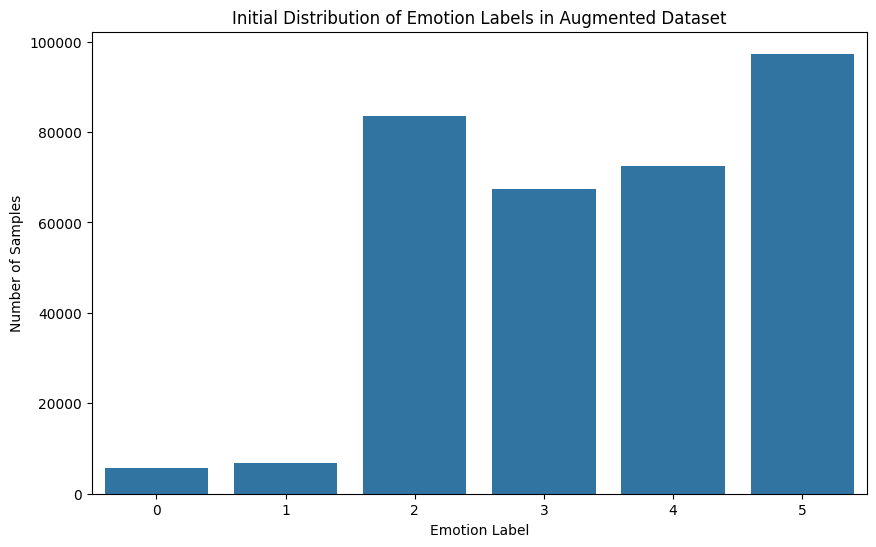

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts of the 'label' column
augmented_label_counts = augmented_df['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=augmented_label_counts.index, y=augmented_label_counts.values)
plt.title('Initial Distribution of Emotion Labels in Augmented Dataset')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

## Identify target sample size for downsampling

### Subtask:
Determine the size of the minority class to set as the target size for downsampling the majority classes.


**Reasoning**:
Calculate the value counts of the 'label' column in the augmented DataFrame and find the size of the smallest class.



In [ ]:
# Calculate the value counts of the 'label' column in the augmented DataFrame
augmented_label_counts = augmented_df['label'].value_counts()

print("Label distribution in the augmented DataFrame:")
print(augmented_label_counts)

# Identify the size of the smallest class (minority class)
minority_class_size = augmented_label_counts.min()

print(f"\nThe size of the minority class (target for downsampling) is: {minority_class_size}")

Label distribution in the augmented DataFrame:
label
5    97331
2    83561
4    72533
3    67493
1     6761
0     5797
Name: count, dtype: int64

The size of the minority class (target for downsampling) is: 5797


**Reasoning**:
Downsample each class in the augmented DataFrame to the size of the minority class and then plot the new distribution to verify the balancing.



Balanced DataFrame shape: (34782, 3)


C:\Users\adria\AppData\Local\Temp\ipykernel_50532\3563005290.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = augmented_df.groupby('label').apply(


,text,label,emotion
0,i feel somewhat victimized,0,sadness
1,i feel devastated betrayed and abandoned i ask...,0,sadness
2,i cant find it in my heart to feel the least b...,0,sadness
3,i cannot deny that right now i am feeling disi...,0,sadness
4,i feel pretty lame all together so i will stop...,0,sadness



Label distribution in the balanced DataFrame (with emotion names):
emotion
sadness     5797
joy         5797
love        5797
anger       5797
fear        5797
surprise    5797
Name: count, dtype: int64


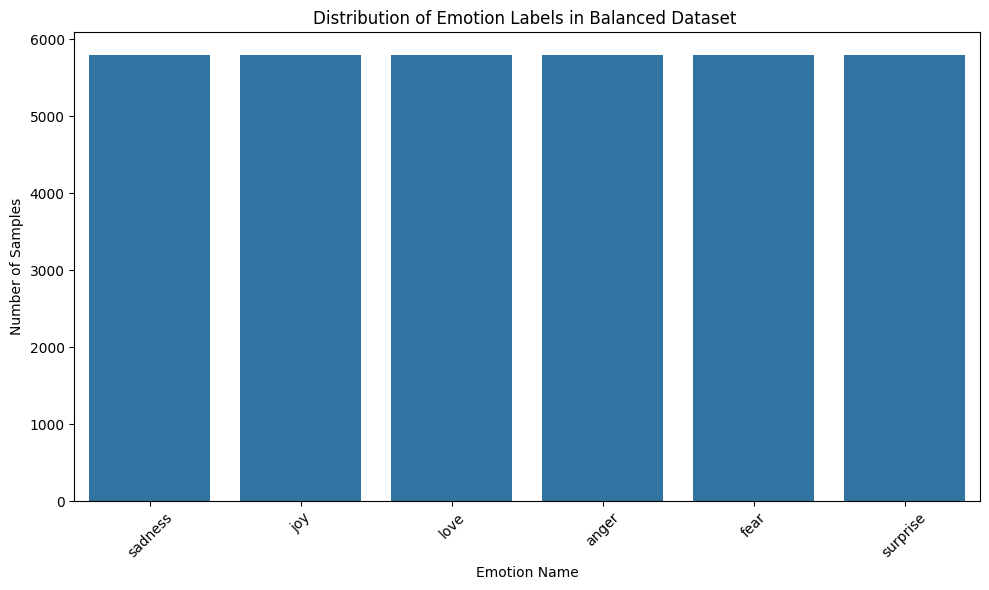

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the target sample size (size of the minority class)
target_sample_size = augmented_label_counts.min()

# Downsample each class to the target sample size
balanced_df = augmented_df.groupby('label').apply(
    lambda x: x.sample(target_sample_size, random_state=42)
).reset_index(drop=True)

# Add an 'emotion' column to the balanced_df for plotting with names
label_to_emotion = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}
balanced_df['emotion'] = balanced_df['label'].map(label_to_emotion)


# Display the shape of the balanced DataFrame
print("Balanced DataFrame shape:", balanced_df.shape)
display(balanced_df.head())

# Calculate and plot the label distribution in the balanced DataFrame
balanced_label_counts = balanced_df['emotion'].value_counts() # Use 'emotion' column for counts

print("\nLabel distribution in the balanced DataFrame (with emotion names):")
print(balanced_label_counts)

# Create a bar plot for the balanced distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=balanced_label_counts.index, y=balanced_label_counts.values) # Use emotion names for x-axis
plt.title('Distribution of Emotion Labels in Balanced Dataset ')
plt.xlabel('Emotion Name') # Updated label
plt.ylabel('Number of Samples')
plt.xticks(rotation=45) # Rotate labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

## Plot balanced distribution

### Subtask:
Visualize the class distribution of the downsampled dataset using a bar chart to verify balance.


**Reasoning**:
Calculate the value counts of the 'label' column in the balanced_df and create a bar plot to visualize the distribution.



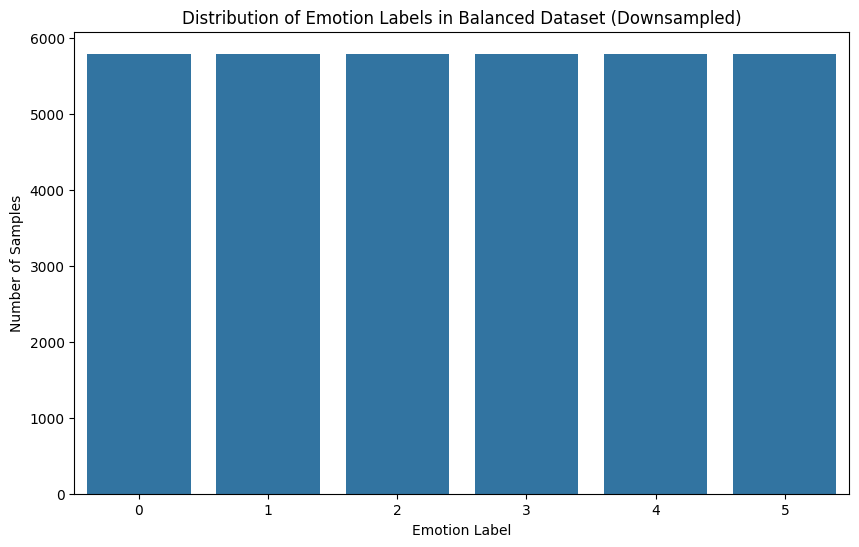

In [ ]:
# Calculate the value counts of the 'label' column in the balanced DataFrame
balanced_label_counts = balanced_df['label'].value_counts()

# Create a bar plot for the balanced distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=balanced_label_counts.index, y=balanced_label_counts.values)
plt.title('Distribution of Emotion Labels in Balanced Dataset (Downsampled)')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

In [ ]:
from transformers import RobertaTokenizer
from sklearn.model_selection import train_test_split
from datasets import Dataset

# Load the Roberta tokenizer
# We will use 'roberta-base' as the base model for classification
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Split the balanced DataFrame into training and testing sets
train_df_clf, test_df_clf = train_test_split(balanced_df, test_size=0.2, random_state=42, stratify=balanced_df['label'])

print("Shape of training set for classification:", train_df_clf.shape)
print("Shape of testing set for classification:", test_df_clf.shape)

# Convert pandas DataFrames to Hugging Face Dataset objects
train_dataset_clf = Dataset.from_pandas(train_df_clf)
test_dataset_clf = Dataset.from_pandas(test_df_clf)

# Function to tokenize the text and prepare inputs for Roberta
def tokenize_function_clf(examples):
    # Use batch=True for faster processing
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128) # Adjust max_length if needed

# Apply tokenization to the datasets
tokenized_train_dataset_clf = train_dataset_clf.map(tokenize_function_clf, batched=True)
tokenized_test_dataset_clf = test_dataset_clf.map(tokenize_function_clf, batched=True)


# Add the 'label' column to the tokenized datasets
# The Trainer expects the labels to be named 'labels'
tokenized_train_dataset_clf = tokenized_train_dataset_clf.rename_column("label", "labels")
tokenized_test_dataset_clf = tokenized_test_dataset_clf.rename_column("label", "labels")

# Remove original text column and other unnecessary columns
tokenized_train_dataset_clf = tokenized_train_dataset_clf.remove_columns(["text", "__index_level_0__"])
tokenized_test_dataset_clf = tokenized_test_dataset_clf.remove_columns(["text", "__index_level_0__"])


print("\nTokenization and data preparation for classification complete.")
print(tokenized_train_dataset_clf)
print(tokenized_test_dataset_clf)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Shape of training set for classification: (27825, 2)
Shape of testing set for classification: (6957, 2)


Map:   0%|          | 0/27825 [00:00<?, ? examples/s]

Map:   0%|          | 0/6957 [00:00<?, ? examples/s]


Tokenization and data preparation for classification complete.
Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 27825
})
Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 6957
})


In [ ]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer

# Define the number of unique labels in your dataset
# Assuming balanced_df has been loaded and processed, get the number of unique labels
num_labels = balanced_df['label'].nunique()
print(f"Number of unique labels: {num_labels}")

# Load the pre-trained Roberta model for sequence classification
# Configure it for the number of unique labels
model_clf = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=num_labels)

# Load the corresponding Roberta tokenizer
tokenizer_clf = RobertaTokenizer.from_pretrained('roberta-base')

print("\nRoberta model for classification and tokenizer loaded successfully.")

Number of unique labels: 6


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Roberta model for classification and tokenizer loaded successfully.


In [ ]:
from transformers import TrainingArguments

# Define training arguments
training_args_clf = TrainingArguments(
    output_dir="./classification_results",  # Output directory
    num_train_epochs=3,  # Default number of training epochs
    per_device_train_batch_size=16,  # Batch size per device during training
    per_device_eval_batch_size=64,  # Batch size for evaluation
    weight_decay=0.01,  # Strength of weight decay
    logging_dir="./classification_logs",  # Directory for storing logs
    logging_steps=50,
    eval_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch", # Save checkpoint at the end of each epoch
    load_best_model_at_end=True, # Load the best model based on eval_loss at the end of training
    metric_for_best_model="eval_loss", # Metric to use to load the best model
    greater_is_better=False, # Smaller eval_loss is better
    report_to="none", # Do not report to any online service
    fp16=True, # Enable mixed precision training
    # Removed no_cuda=True to enable GPU usage
)

print("Default Training arguments for classification defined successfully (with fp16 enabled).")

Default Training arguments for classification defined successfully (with fp16 enabled).


## Define model initialization for hyperparameter search

### Subtask:
Create a function that initializes a new `RobertaForSequenceClassification` model for each trial of the hyperparameter search.

**Reasoning**:
Define a `model_init` function that will be called by the Hugging Face Trainer during hyperparameter search. This function is responsible for loading a fresh instance of the `RobertaForSequenceClassification` model from the pre-trained weights for each new trial, ensuring that each trial starts with the same initial model state. It also configures the model with the correct number of labels.

In [ ]:
from transformers import RobertaForSequenceClassification

def model_init_clf(trial):
    # Load a pre-trained Roberta model for sequence classification
    # Configure it for the number of unique labels
    # We need the number of labels which was determined earlier
    # Assuming num_labels is available from previous steps
    return RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=num_labels)

print("Model initialization function for classification defined.")

Model initialization function for classification defined.


## Define compute_metrics function

### Subtask:
Create a function to compute evaluation metrics during training.

**Reasoning**:
Define a `compute_metrics` function that takes evaluation predictions and labels and returns a dictionary of metrics. For classification, common metrics include accuracy, precision, recall, and F1-score. This function will be used by the Trainer during evaluation.

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

print("Compute metrics function defined.")

Compute metrics function defined.


## Define Objective Function for Hyperparameter Search

### Subtask:
Create a function that sets up the Trainer, trains the model with given hyperparameters, evaluates at each epoch, and returns the metric to be optimized.

**Reasoning**:
Define the `objective` function for Optuna. This function takes a `trial` object, suggests hyperparameters (learning rate and number of epochs), updates the training arguments, initializes the Trainer with the `model_init_clf` function and `compute_metrics` function, trains and evaluates the model, and returns the evaluation metric (e.g., F1-score or accuracy) that Optuna will try to maximize or minimize.

In [ ]:
from transformers import Trainer
import optuna # Import optuna here as well for the objective function definition
from transformers import TrainingArguments # Import TrainingArguments here for the objective function


def objective_clf(trial):
    # Define hyperparameters to search
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True)
    num_train_epochs = trial.suggest_int("num_train_epochs", 2, 5) # Suggest between 2 and 5 epochs

    # Update training arguments with suggested hyperparameters
    # We will use a copy of the base training_args_clf to avoid modifying it directly
    current_training_args = TrainingArguments(
        output_dir=f"./classification_results_trial_{trial.number}",  # Unique output dir for each trial
        num_train_epochs=num_train_epochs,
        per_device_train_batch_size=training_args_clf.per_device_train_batch_size, # Use base batch size
        per_device_eval_batch_size=training_args_clf.per_device_eval_batch_size,
        weight_decay=training_args_clf.weight_decay,
        logging_dir=f"./classification_logs_trial_{trial.number}", # Unique log dir
        logging_steps=training_args_clf.logging_steps,
        eval_strategy=training_args_clf.eval_strategy, # Corrected argument name
        save_strategy=training_args_clf.save_strategy,
        load_best_model_at_end=training_args_clf.load_best_model_at_end,
        metric_for_best_model=training_args_clf.metric_for_best_model,
        greater_is_better=training_args_clf.greater_is_better,
        report_to=training_args_clf.report_to,
        fp16=training_args_clf.fp16,
        learning_rate=learning_rate, # Set the suggested learning rate
    )


    # Initialize Trainer
    trainer = Trainer(
        model_init=model_init_clf, # Use the model_init_clf function
        args=current_training_args,
        train_dataset=tokenized_train_dataset_clf, # Use the tokenized classification data
        eval_dataset=tokenized_test_dataset_clf,   # Use the tokenized classification data
        compute_metrics=compute_metrics, # Use the compute_metrics function
    )

    # Train the model
    trainer.train()

    # Evaluate the model and return the metric to optimize
    # We want to maximize the evaluation metric specified in training_args (e.g., accuracy or f1)
    eval_results = trainer.evaluate()
    # The metric to optimize is specified by metric_for_best_model in TrainingArguments
    # Since metric_for_best_model is eval_loss and greater_is_better is False,
    # we return negative eval_loss to maximize it with Optuna.
    # If we were optimizing for accuracy or f1, we would return that metric directly.
    return -eval_results[current_training_args.metric_for_best_model] # Return negative of the metric to minimize (eval_loss)

print("Objective function for classification hyperparameter search defined.")

Objective function for classification hyperparameter search defined.


## Run Hyperparameter Search

### Subtask:
Use Optuna to perform the hyperparameter search using the defined objective function.

**Reasoning**:
Create an Optuna study and run the optimization process using the `objective_clf` function. This will explore different combinations of learning rates and epochs to find the best hyperparameters based on the evaluation metric. After the search, the best trial and its parameters will be printed.

In [ ]:
import optuna
from transformers import TrainingArguments # Import TrainingArguments here

# Define training arguments (redefined here for robustness in case previous cell wasn't run)
training_args_clf = TrainingArguments(
    output_dir="./classification_results",  # Output directory
    num_train_epochs=3,  # Default number of training epochs
    per_device_train_batch_size=16,  # Batch size per device during training
    per_device_eval_batch_size=64,  # Batch size for evaluation
    weight_decay=0.01,  # Strength of weight decay
    logging_dir="./classification_logs",  # Directory for storing logs
    logging_steps=50,
    eval_strategy="epoch",  # Evaluate at the end of each epoch (corrected argument name)
    save_strategy="epoch", # Save checkpoint at the end of each epoch
    load_best_model_at_end=True, # Load the best model based on eval_loss at the end of training
    metric_for_best_model="eval_loss", # Metric to use to load the best model
    greater_is_better=False, # Smaller eval_loss is better
    report_to="none", # Do not report to any online service
    fp16=True, # Enable mixed precision training
    # Removed no_cuda=True to enable GPU usage
)


# Create an Optuna study for classification
# We are minimizing evaluation loss, so we set direction="maximize" as we return negative loss
study_clf = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner()) # Using MedianPruner for efficiency

# Run the hyperparameter search
study_clf.optimize(objective_clf, n_trials=1) # You can adjust the number of trials

# Print the best trial
print("\nBest trial for classification:")
print(study_clf.best_trial)

# Print the best hyperparameters
print("\nBest hyperparameters for classification:")
print(study_clf.best_params)

[I 2025-09-24 18:31:22,040] A new study created in memory with name: no-name-fa63c1ae-c16c-4ae6-b43f-72f496ad6636
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.390800,0.370026,0.871640,0.876862,0.871640,0.871587
2,0.295100,0.313078,0.897370,0.898381,0.897370,0.897314
3,0.204500,0.299366,0.895501,0.896418,0.895501,0.895064


[I 2025-09-24 18:49:53,293] Trial 0 finished with value: -0.29936641454696655 and parameters: {'learning_rate': 2.758494129712084e-05, 'num_train_epochs': 3}. Best is trial 0 with value: -0.29936641454696655.



Best trial for classification:
FrozenTrial(number=0, state=TrialState.COMPLETE, values=[-0.29936641454696655], datetime_start=datetime.datetime(2025, 9, 24, 18, 31, 22, 41356), datetime_complete=datetime.datetime(2025, 9, 24, 18, 49, 53, 293431), params={'learning_rate': 2.758494129712084e-05, 'num_train_epochs': 3}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=5e-05, log=True, low=1e-05, step=None), 'num_train_epochs': IntDistribution(high=5, log=False, low=2, step=1)}, trial_id=0, value=None)

Best hyperparameters for classification:
{'learning_rate': 2.758494129712084e-05, 'num_train_epochs': 3}


## Train Model with Best Hyperparameters and Save

### Subtask:
Initialize and train the Roberta model with the best hyperparameters found by Optuna and save the trained model to a specified path.

**Reasoning**:
Retrieve the best hyperparameters from the completed Optuna study (`study_clf.best_params`). Update the `TrainingArguments` with these best parameters (learning rate and number of epochs). Initialize a new `RobertaForSequenceClassification` model. Create a `Trainer` instance using the initialized model, updated training arguments, and the tokenized training and testing datasets. Train the model using the `trainer.train()` method. Finally, save the trained model to a specified directory using `trainer.save_model()`.

In [ ]:
from transformers import Trainer, RobertaForSequenceClassification

# Get the best hyperparameters from the completed Optuna study
# Assuming study_clf is available from the previous cell's execution
best_hyperparameters_clf = study_clf.best_params
print("Best hyperparameters found by Optuna:", best_hyperparameters_clf)


# Update the base training arguments with the best hyperparameters
# Create a new TrainingArguments instance or update the existing one
training_args_clf.learning_rate = best_hyperparameters_clf["learning_rate"]
training_args_clf.num_train_epochs = best_hyperparameters_clf["num_train_epochs"]

# It's good practice to use a different output directory for the final trained model
training_args_clf.output_dir = "./final_classification_model"
training_args_clf.logging_dir = "./final_classification_logs"

# Initialize a new Roberta model with the correct number of labels
# Using from_pretrained again ensures we start from the base model
model_clf_final = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=num_labels)


# Initialize Trainer for the final training run
trainer_final = Trainer(
    model=model_clf_final,
    args=training_args_clf,
    train_dataset=tokenized_train_dataset_clf,
    eval_dataset=tokenized_test_dataset_clf,
    compute_metrics=compute_metrics, # Use the compute_metrics function for evaluation during training
)

print("\nStarting final model training with best hyperparameters...")

# Train the model
trainer_final.train()

# Define the path to save the final trained model
save_path_clf = "C:/Users/adria/OneDrive/Desktop/CODING/jupyter/models/dairemotion/roberta_classifier"

# Save the trained model
trainer_final.save_model(save_path_clf)

print(f"\nFinal trained Roberta classification model saved to {save_path_clf}")

# You may also want to save the tokenizer, although it's the base Roberta tokenizer
# tokenizer_clf.save_pretrained(save_path_clf)

Best hyperparameters found by Optuna: {'learning_rate': 2.758494129712084e-05, 'num_train_epochs': 3}


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Starting final model training with best hyperparameters...


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.415600,0.363211,0.876671,0.883634,0.876671,0.875702
2,0.299700,0.309012,0.893776,0.894115,0.893776,0.893376
3,0.209400,0.294010,0.895788,0.896228,0.895788,0.895352



Final trained Roberta classification model saved to C:/Users/adria/OneDrive/Desktop/CODING/jupyter/models/dairemotion/roberta_classifier


## Evaluate the final model

### Subtask:
Evaluate the performance of the trained Roberta model on the test set and generate a classification report and confusion matrix.

**Reasoning**:
Use the trained `trainer_final` to make predictions on the `tokenized_test_dataset_clf`. Extract the predicted labels and true labels. Use `sklearn.metrics.classification_report` to generate a report with precision, recall, F1-score, and support for each class. Use `sklearn.metrics.confusion_matrix` and `seaborn.heatmap` to generate and visualize the confusion matrix.

Classification Report:
              precision    recall  f1-score   support

     sadness       0.98      0.98      0.98      1159
         joy       0.98      0.97      0.98      1159
        love       0.81      0.74      0.78      1160
       anger       0.79      0.85      0.82      1160
        fear       0.94      0.90      0.92      1160
    surprise       0.88      0.93      0.91      1159

    accuracy                           0.90      6957
   macro avg       0.90      0.90      0.90      6957
weighted avg       0.90      0.90      0.90      6957



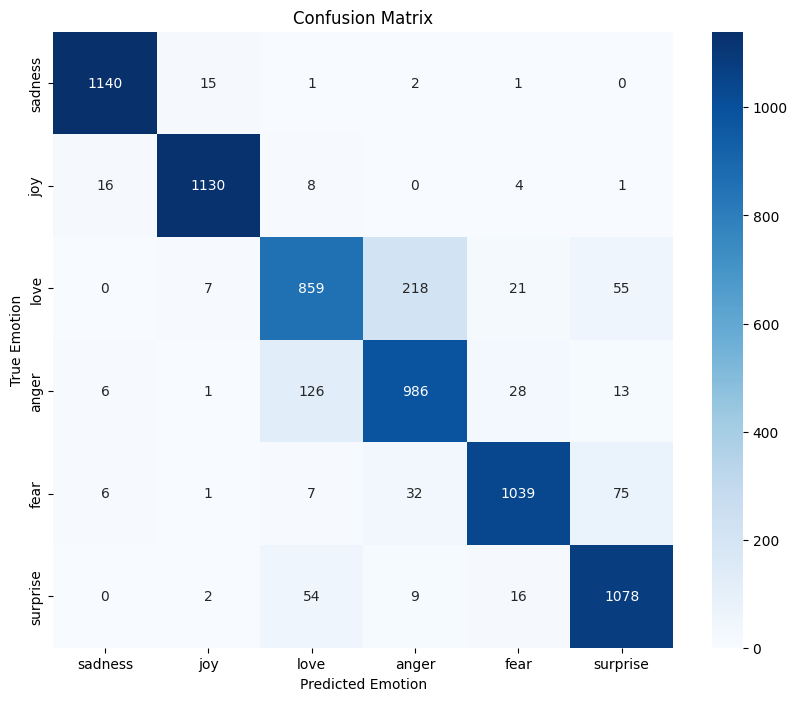

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
predictions = trainer_final.predict(tokenized_test_dataset_clf)

# Get the predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Get the true labels
true_labels = predictions.label_ids

# Define the mapping from numerical labels to emotion names (assuming this mapping is consistent)
# Based on previous code, the mapping is:
# 0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'
label_to_emotion_names = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

# Get the emotion names corresponding to the unique labels in the dataset
# Ensure we only include labels present in the dataset
unique_labels = sorted(np.unique(true_labels)) # Get unique labels and sort them
target_names = [label_to_emotion_names[label] for label in unique_labels if label in label_to_emotion_names]


# Generate classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=target_names)) # Use emotion names as target names

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, # Use emotion names for x-axis
            yticklabels=target_names) # Use emotion names for y-axis
plt.xlabel('Predicted Emotion')
plt.ylabel('True Emotion')
plt.title('Confusion Matrix')
plt.show()